In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding = 'latin')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

data cleaning


In [6]:
df.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns = {'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df= pd.get_dummies(df, columns=['target'])

In [12]:
df.head()

,text,target_ham,target_spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0


In [13]:
df.drop(columns=['target_ham'],inplace=True)

In [14]:
df.head()

,text,target_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
df.rename(columns={'target_spam':'target'},inplace=True)

In [16]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [17]:
#missing values
df.isnull().sum()

text      0
target    0
dtype: int64

In [18]:
#check for duplicate values
df.duplicated().sum()

403

In [19]:
#removing duplicate values
df = df.drop_duplicates(keep='first')

In [20]:
#check for duplicate values
df.duplicated().sum()

0

exploratory data analysis


In [21]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

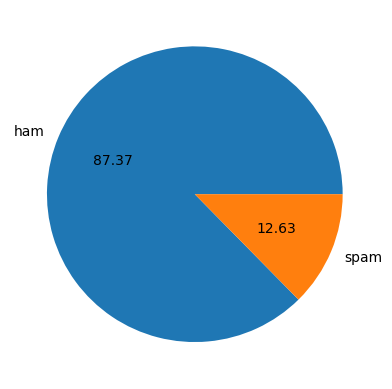

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rites\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#no. of characters in text
df['num_char'] = df['text'].apply(len)

In [26]:
df.head()

,text,target,num_char
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [27]:
#no. of words
df['num_words']=df['text'].apply( lambda x: len(nltk.word_tokenize(x)))

In [28]:
df.head()

,text,target,num_char,num_words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [29]:
#no. of sentences
df['num_sent'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,text,target,num_char,num_words,num_sent
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [31]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

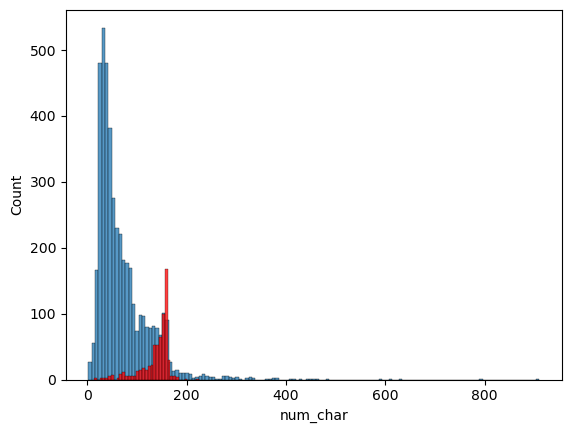

In [35]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

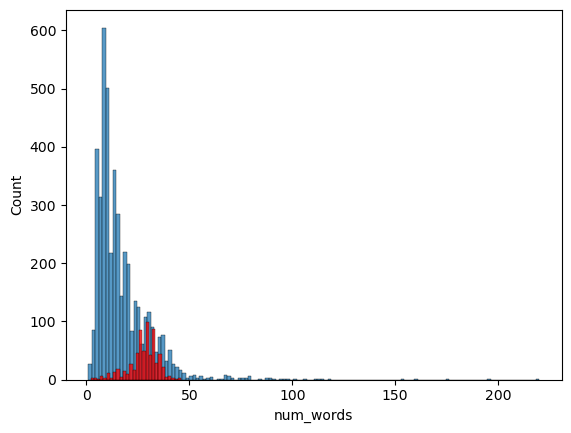

In [36]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [37]:
df.corr()

C:\Users\rites\AppData\Local\Temp\ipykernel_50076\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_char,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


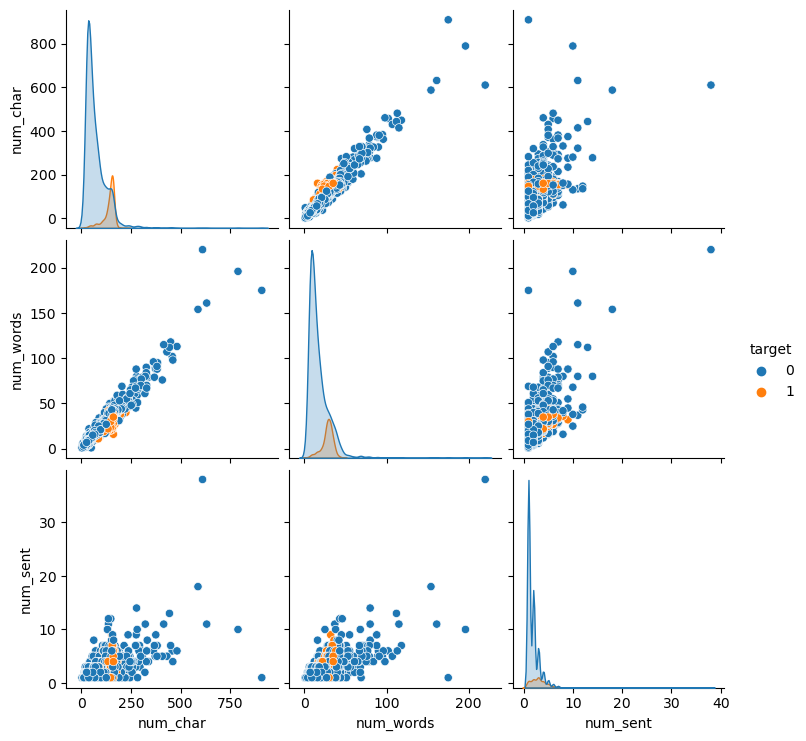

In [38]:
sns.pairplot(df,hue='target')

C:\Users\rites\AppData\Local\Temp\ipykernel_50076\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

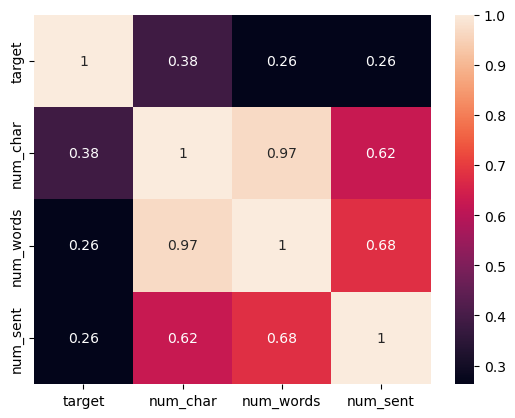

In [39]:
sns.heatmap(df.corr(),annot=True)

DATA PREPROCESSING

In [40]:
#FUNCTION WHICH WILL PERFORM

#LOWER CASE

#TOKENIZATION

#REMOVING SPECIAL CHARACTERS

#REMOVING STOP WORDS AND PUNCTUATION
from nltk.corpus import stopwords
import string

#STEMMING
from nltk.stem import PorterStemmer


def transform_text(text):
    text = text.lower()
    
    #tokenization
    text = nltk.word_tokenize(text)
    
    #removing special characters
    
    new_text=[]
    for i in text:
        if i.isalnum():
            new_text.append(i)
    
    
    
    text = new_text[:]
    new_text.clear()
    
    #stop word filter
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            
            
            
            #lemmatization
            ps = PorterStemmer()
            
            new_text.append(ps.stem(i))
    
    return " ".join(new_text) 
    

In [41]:
print(transform_text("got"))

got


In [42]:
print(transform_text(df['text'][10]))

gon na home soon want talk stuff anymor tonight k cri enough today


In [43]:
df['transform_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,text,target,num_char,num_words,num_sent,transform_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [45]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            5169 non-null   object
 1   target          5169 non-null   uint8 
 2   num_char        5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sent        5169 non-null   int64 
 5   transform_text  5169 non-null   object
dtypes: int64(3), object(2), uint8(1)
memory usage: 376.4+ KB


In [46]:
df.rename(columns={'transform_text':'transformed_text'},inplace=True)

In [47]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=700, height=700, min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

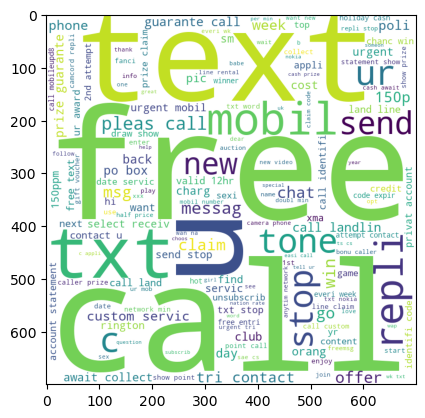

In [49]:
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

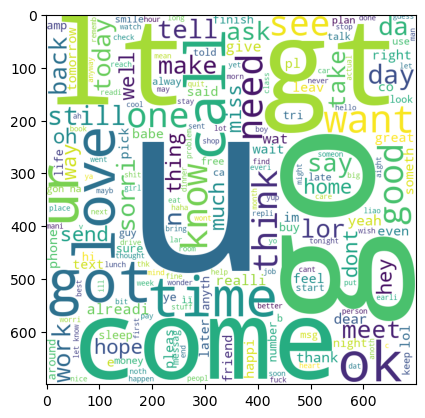

In [51]:
plt.imshow(ham_wc)

In [52]:
 
spam_corpus =[]

for i in df[df['target']==1]['transformed_text'].tolist():
    for word in i.split(): #split at white space
        spam_corpus.append(word)

In [53]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [54]:
len(spam_corpus)

9939

In [55]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

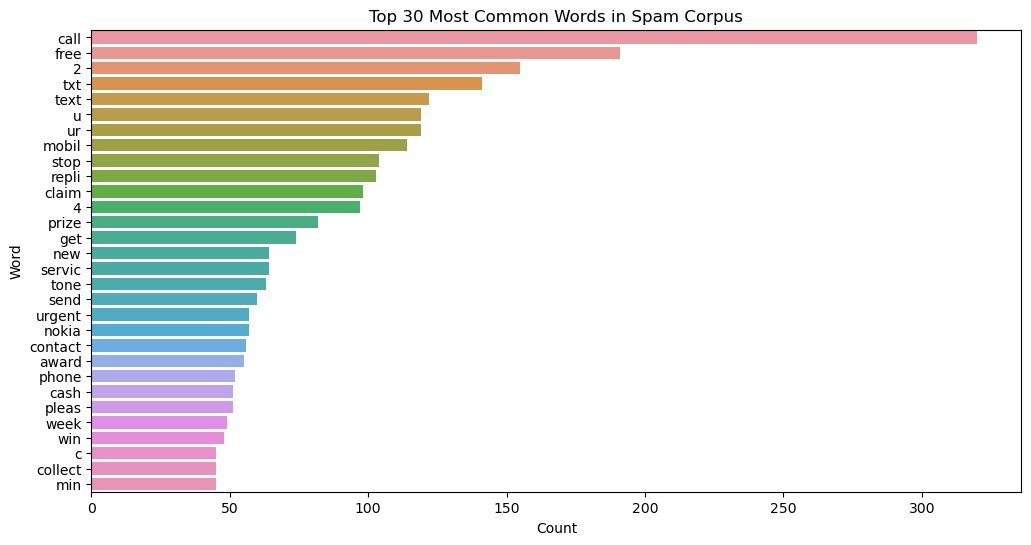

In [56]:
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



word_counts = collections.Counter(spam_corpus).most_common(30)

# Create a DataFrame from the word_counts list
df_temp = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_temp)
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Top 30 Most Common Words in Spam Corpus')

plt.show()


# MODEL BUILDING

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [58]:

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(5169, 6708)

In [60]:
Y=df['target'].values

In [61]:
Y.shape

(5169,)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2 , random_state =30)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.874274661508704
[[781 107]
 [ 23 123]]
0.5347826086956522


In [66]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9487427466150871
[[888   0]
 [ 53  93]]
1.0


In [67]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.965183752417795
[[885   3]
 [ 33 113]]
0.9741379310344828


In [68]:

#tfidf -> mnb

In [69]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [72]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9632495164410058
Precision -  0.9655172413793104
For  KN
Accuracy -  0.8955512572533849
Precision -  1.0
For  NB
Accuracy -  0.9487427466150871
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8317757009345794
For  LR
Accuracy -  0.9429400386847195
Precision -  0.9484536082474226
For  RF
Accuracy -  0.960348162475822
Precision -  1.0
For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.9478260869565217
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8939393939393939
For  ETC
Accuracy -  0.9700193423597679
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9142857142857143
For  xgb
Accuracy -  0.9574468085106383
Precision -  0.925


In [75]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.895551,1.000000
2,NB,0.948743,1.000000
5,RF,0.960348,1.000000
8,ETC,0.970019,0.983193
0,SVC,0.963250,0.965517
4,LR,0.942940,0.948454
6,AdaBoost,0.958414,0.947826
10,xgb,0.957447,0.925000
9,GBDT,0.942940,0.914286
7,BgC,0.959381,0.893939


In [84]:

#Applying Voting
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [86]:
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [87]:
voting.fit(X_train,Y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9661508704061895
Precision 1.0


In [90]:
#appling stacking
estimators=[('rf',rfc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()



In [91]:
from sklearn.ensemble import StackingClassifier

In [92]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [93]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))
print("Precision",precision_score(Y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9548872180451128


In [84]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(voting,open('voting_model.pkl','wb'))